Plots to demo eccentricity measurement plots for EMRI waveforms

### Demo for EMRIs

In [1]:
import sys
import os

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from few.trajectory.inspiral import EMRIInspiral
from few.amplitude.romannet import RomanAmplitude
from few.amplitude.interp2dcubicspline import Interp2DAmplitude
from few.waveform import FastSchwarzschildEccentricFlux, SlowSchwarzschildEccentricFlux, GenerateEMRIWaveform
from few.utils.utility import (get_overlap, 
                               get_mismatch, 
                               get_fundamental_frequencies, 
                               get_separatrix, 
                               get_mu_at_t, 
                               get_p_at_t, 
                               get_kerr_geo_constants_of_motion,
                               xI_to_Y,
                               Y_to_xI)

from few.utils.ylm import GetYlms
from few.utils.modeselector import ModeSelector
from few.summation.interpolatedmodesum import CubicSplineInterpolant
from few.waveform import SchwarzschildEccentricWaveformBase
from few.summation.interpolatedmodesum import InterpolatedModeSum
from few.summation.directmodesum import DirectModeSum
from few.utils.constants import *
from few.summation.aakwave import AAKSummation
from few.waveform import Pn5AAKWaveform, AAKWaveformBase

/home1/md.shaikh/miniconda3/envs/few_env/lib/python3.7/site-packages/few-1.4.6-py3.7-linux-x86_64.egg/few/amplitude/romannet.py:252: UserWarning: Input length 31559 is larger than initial max_init_len (10000). Reallocating preallocated arrays for this size.
  input_len, self.max_init_len


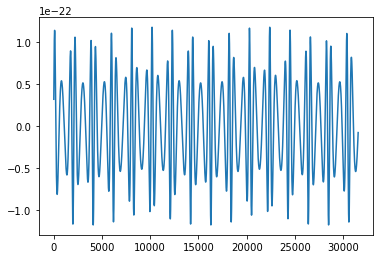

In [49]:
# l = 2, m = 2 wave
specific_modes = [(2, 2, n) for n in range(-30, 31)]

use_gpu = False

# keyword arguments for inspiral generator (RunSchwarzEccFluxInspiral)
inspiral_kwargs={
        "DENSE_STEPPING": 1,  # we want a sparsely sampled trajectory
        "max_init_len": int(1e7),  # dense stepping trajectories
    }

# keyword arguments for inspiral generator (RomanAmplitude)
amplitude_kwargs = {
    "max_init_len": int(1e4),  # this must be >= batch_size
}

# keyword arguments for Ylm generator (GetYlms)
Ylm_kwargs = {
    "assume_positive_m": False  # if we assume positive m, it will generate negative m for all m>0
}

# keyword arguments for summation generator (InterpolatedModeSum)
sum_kwargs = {
    "use_gpu": use_gpu  # GPU is available for this type of summation
}


few_base = FastSchwarzschildEccentricFlux(
    inspiral_kwargs=inspiral_kwargs,
    amplitude_kwargs=amplitude_kwargs,
    Ylm_kwargs=Ylm_kwargs,
    sum_kwargs=sum_kwargs,
    use_gpu=use_gpu)

# parameters
M = 1e6
mu = 1e1
p0 = 12.0
e0 = 0.3
theta = np.pi/3.
phi = np.pi/4.
dist = 1.0
dt = 1.0
T = 0.001
# batch_size = int(1e4)


wave_22 = few_base(M, mu, p0, e0, theta, phi, dist=dist, dt=dt, T=T, mode_selection=specific_modes,  include_minus_m=False)

plt.plot(wave_22.real)

In [50]:
times = np.arange(0, len(wave_22))*dt

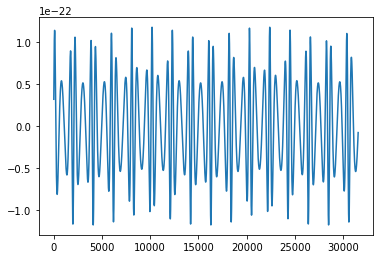

In [51]:
plt.plot(times, wave_22.real)

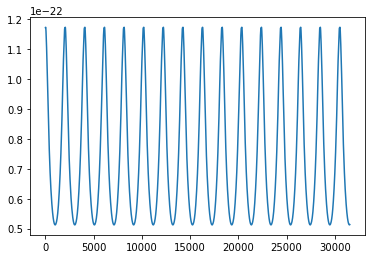

In [52]:
plt.plot(times, np.abs(wave_22))

In [53]:
import h5py
f = h5py.File(f"../../data/ecc_waveforms/Non-Precessing/EMRI_M{M}_mu{mu}_p0{p0:.1f}_e0{e0:.1f}_T{T:.5f}_dt{dt:.5f}_dist{dist}_theta{theta}_phi{phi}.h5", "w")
f["h22"] = wave_22
f["t"] = times
f.attrs["M"] = M
f.attrs["mu"] = mu
f.attrs["e0"] = e0
f.attrs["p0"] = p0
f.attrs["T"] = T
f.attrs["dt"] = dt
f.attrs["dist"] = dist
f.attrs["theta"] = theta
f.attrs["phi"] = phi

In [54]:
f.close()

In [40]:
f2 = h5py.File(f"../../data/ecc_waveforms/Non-Precessing/EMRI_M{M}_mu{mu}_p0{p0:.1f}_e0{e0:.1f}_T{T:.5f}_dt{dt:.5f}_dist{dist}_theta{theta}_phi{phi}.h5")

In [45]:
f2.attrs["M"]

1000000.0

In [47]:
f2["t"][:]

array([0.000e+00, 1.000e+01, 2.000e+01, ..., 3.153e+04, 3.154e+04,
       3.155e+04])

In [48]:
f2.close()